# Titanic Data set Exploration

## Data exploration and Feature engineering

In [190]:
import zipfile
import os

import numpy as np
import pandas as pd

# Path to my data zip file
zip_path = "titanic.zip"
# Extract location
extract_dir = 'data'

# Step 1: Unzip the folder
with zipfile.ZipFile(zip_path,'r') as zf:
    zf.extractall(extract_dir)

# Step 2: Load files into DataFrames
dataframes = {}
for filename in os.listdir(extract_dir):
    filepath = os.path.join(extract_dir, filename)
    if filename.endswith(".csv"):
        #splitext splits on points so train.csw >> [train, csv]
        df_name = os.path.splitext(filename)[0]
        dataframes[df_name] = pd.read_csv(filepath)
    elif filename.endswith('.xlsx'):
        df_name = os.path.splitext(filename)[0]
        dataframes[df_name] = pd.read_excel(filepath)


In [191]:
# Beispiel: Schau dir die geladenen DataFrames an
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

# Save df objects into single variables from dictionary
train = dataframes['train']
test = dataframes['test']
gender_submission = dataframes['gender_submission']
print(train.head())

gender_submission: (418, 2)
test: (418, 11)
train: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123      

In [192]:
print(train.shape, test.shape, gender_submission.shape)

#print(test.info())
print(train.info())
print(train.describe())
# test has no info on survived or not

#print(gender_submission.info())

(891, 12) (418, 11) (418, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   


We see here we have some not numerical Columns like Name,Sex,Ticket,Cabin,Embarked

In [193]:
# Look at the data

# Find missing values to decide what to do with them
missing = train.isnull().sum()
print(f"Missing values[TOTAL VALUES {train.shape[0]}]:\n {missing[missing > 0]}")

# Decide what to do with the missing data
# we could: {ingore it} {replace with mean or a distribution} {delete the columns with much missing data}
# We also have to decide what we do with categorical data like sex or embarked
print("Before filling in the values:")
print("  Anzahl NaNs:", train["Age"].isna().sum())
print("  Anzahl gültiger Werte:", train["Age"].notna().sum())
print("  Median:", train["Age"].median())
print("  Mean:", train["Age"].mean())

# Fill in the missing data with the median
train["Age"] = train['Age'].fillna(train['Age'].median())

print(f"Values which are not Zero in Age:\n{train["Age"].notna().sum()}")

# Handle the other not numerical Values
print(f"NaN entrys in Sex:\n{test["Sex"].isna().sum()}")

# Decide what to do with it
# >> Here we can just set female to 0 and male to 1 because we know it only has 2 values
print(f"Diferent values in Sex: {train["Sex"].value_counts().shape}")
print(f"Diferent values in Sex: {train["Sex"].value_counts()}")
print(f"Unique entrys in Sex\n:{train["Sex"].unique()}")
# so we change the catogory entry into a numerical one
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
print(f"Diferent values in Sex after mapping: {train["Sex"].value_counts().shape}")
print(f"Diferent values in  after mapping: {train["Sex"].value_counts()}")


Missing values[TOTAL VALUES 891]:
 Age         177
Cabin       687
Embarked      2
dtype: int64
Before filling in the values:
  Anzahl NaNs: 177
  Anzahl gültiger Werte: 714
  Median: 28.0
  Mean: 29.69911764705882
Values which are not Zero in Age:
891
NaN entrys in Sex:
0
Diferent values in Sex: (2,)
Diferent values in Sex: Sex
male      577
female    314
Name: count, dtype: int64
Unique entrys in Sex
:['male' 'female']
Diferent values in Sex after mapping: (2,)
Diferent values in  after mapping: Sex
1    577
0    314
Name: count, dtype: int64


In [194]:
### Handle the other categorical Values
# Name
###
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [195]:
### Handle the other categorical Values
# Ticket
###
print(train["Ticket"].nunique(), "/", len(train))
print(f"Different tickets:\n{train["Ticket"].unique()}")
print(f"Different tickets:\n{train["Ticket"].value_counts()}")
# >> OK so every ticket has a unique number >> (Maybe just  drop the whole row )
train.drop("Ticket", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)

681 / 891
Different tickets:
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367'

In [196]:
### Handle the other categorical Values
# Cabin
###
print(f"NaN Values:\n{train["Cabin"].isna().sum()} from {len(train)}")
print(f"Unique values in Cabin:\n{train["Cabin"].unique()}")
print(f"Non unique values in Cabin:\n{train["Cabin"].nunique(), "/", len(train)}")
print(f"Different Cabines:\n{train["Cabin"].unique()}")
print(f"Different Cabines:\n{train["Cabin"].value_counts()}")
# Theoretical the Cabin could correlate with the surviving rate maybe if it is pricier or smth
# Create new column deck
train["Deck"] = train["Cabin"].str[0]
print(train["Deck"].value_counts())
train["Deck"] = train["Cabin"].str[0]
print(f"Look for correlation between deck and surviving rate{pd.crosstab(train["Deck"], train["Survived"]).apply(lambda r: r / r.sum(), axis=1)}")

# 700 von 900 Werten fehlen >> Drop
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

NaN Values:
687 from 891
Unique values in Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C

In [197]:
# Handle the new column Deck
train["Deck"] = train["Deck"].fillna("U")  # U = Unknown
train.drop("Deck", axis=1, inplace=True)


We see here that Deck B has 75 % surviving rate like Deck E and D

In [198]:
### Handle the other categorical Values
# Embarked
###
print(f"Missing Values in Embarked:\n{train['Embarked'].isna().sum()}")
print(train["Embarked"].nunique(), "/", len(train))
print(f"Different Embarked:\n{train["Embarked"].unique()}")
print(f"Different Embarked:\n{train["Embarked"].value_counts()}")


# Only 2 values are misssing o we fill them with the most commonly
most_common_embarked = train["Embarked"].mode()[0]

train["Embarked"] = train["Embarked"].fillna(most_common_embarked)
test["Embarked"] = test["Embarked"].fillna(most_common_embarked)
print(f"Missing Values in Embarked after filling:\n{train['Embarked'].isna().sum()}")

# We have category string so we use ONE-HOT-ENCODING
# So for every unique value a new column gets created that is either 1 or zero depending on the Value in that row
train = pd.get_dummies(train, columns=["Embarked"], prefix="Embarked")
test = pd.get_dummies(test, columns=["Embarked"], prefix="Embarked")
# It could happen that for some reason our test set doesnt contain all sorts of the values from the Embarked section for Examples no "S", "C", or Q".
# That's very unlikely so we don't do anything about it here


Missing Values in Embarked:
2
3 / 891
Different Embarked:
['S' 'C' 'Q' nan]
Different Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Missing Values in Embarked after filling:
0


Correlation Matrix with only numerical values:
             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.172482  0.096688  
SibSp        0.414838  0.159651  
Parch       

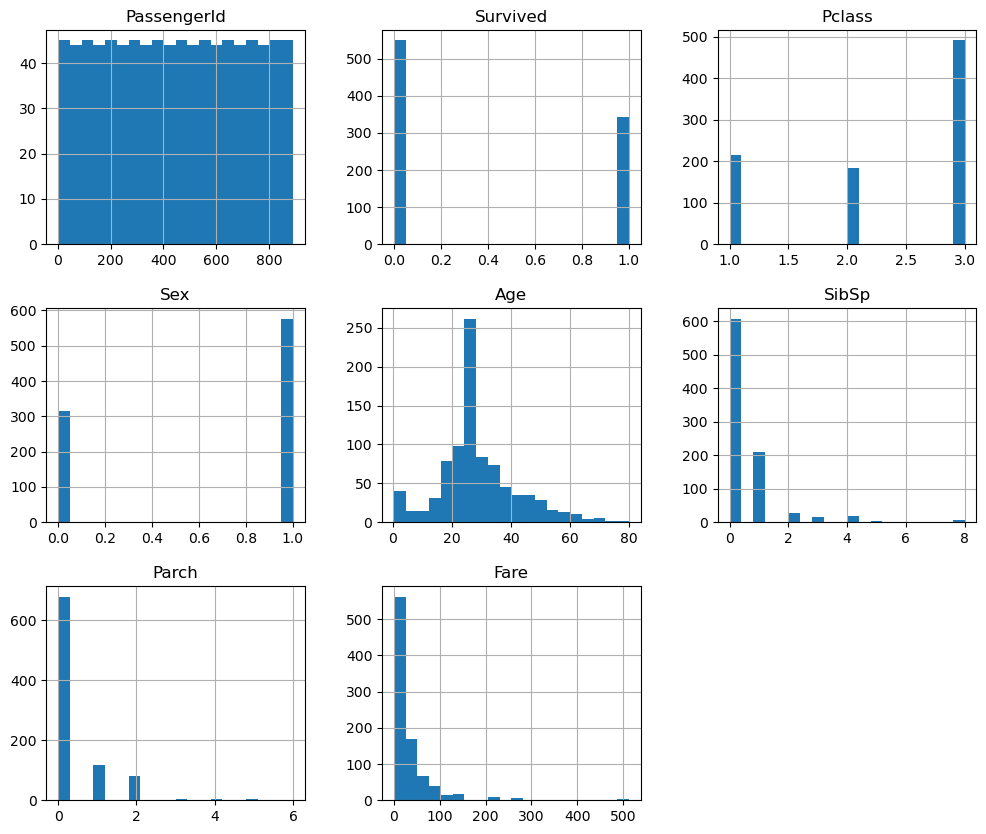

In [199]:
import matplotlib.pyplot as plt
import numpy as np
train.hist(bins=20, figsize=(12,10))


# Only use numerical columns for correlation matrix
corr_matrix = train.select_dtypes(include=np.number).corr()

print(f"Correlation Matrix with only numerical values:\n{corr_matrix}")

## Model creation and training

In [200]:
# Goal Value to predict
y = train["Survived"]

X = train.drop("Survived", axis=1)


In [201]:
# Split data set into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [202]:
# Start with simple Model
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create Model
model = LogisticRegression(max_iter=1000)

# Training
model.fit(X_train, y_train)

# Evaluate on the validation data set
y_pred = model.predict(X_val)


# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))


# First row: 105 passengers did not survive, and we predicted 89 of them correctly.
#Second row: 74 passengers survived, and we predicted 55 of them correctly.
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

print("Classification Report:\n", classification_report(y_val, y_pred))
print("Anzahl tatsächlicher 0er:", sum(y_val == 0))  # 105
print("Anzahl tatsächlicher 1er:", sum(y_val == 1))  # 74

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Anzahl tatsächlicher 0er: 105
Anzahl tatsächlicher 1er: 74


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [203]:
# Let's try a random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train it on the same train/val split
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))



importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

print(feat_df.head(10))

Random Forest Accuracy: 0.8268156424581006
Confusion Matrix:
 [[91 14]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

       Feature  Importance
2          Sex    0.253147
6         Fare    0.202162
0  PassengerId    0.194992
3          Age    0.163856
1       Pclass    0.079547
4        SibSp    0.042711
5        Parch    0.028193
9   Embarked_S    0.013470
7   Embarked_C    0.013381
8   Embarked_Q    0.008541


In [204]:
# Now search for the best hyperparamters using grid search and createthe final model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter-Raster definieren
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modell vorbereiten
rf = RandomForestClassifier(random_state=42)

# GridSearchCV initialisieren
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Suche durchführen
grid_search.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [205]:
# Look at the best parameters
print("Best Params:", grid_search.best_params_)
print("Best Score (Cross-Validation):", grid_search.best_score_)



Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (Cross-Validation): 0.8294143493817087


In [206]:
# Train best model on the whole training set
best_rf = grid_search.best_estimator_
best_rf.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [212]:
# Synchronize the columns with the test columns
# ALl new features without the survived because we dropped it before
for col in X.columns:
    if col not in test.columns:
        test[col] = 0
# Make it have the same order
test = test[X.columns]
test["Sex"] = test["Sex"].map({"male": 1, "female": 0})
print("Survived" in X.columns)  # ➝ Sollte False sein!
print("Survived" in test.columns)  # ➝ Sollte False bleiben!
print(test.head())

False
False
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0          892       3    1  34.5      0      0   7.8292       False   
1          893       3    0  47.0      1      0   7.0000       False   
2          894       2    1  62.0      0      0   9.6875       False   
3          895       3    1  27.0      0      0   8.6625       False   
4          896       3    0  22.0      1      1  12.2875       False   

   Embarked_Q  Embarked_S  
0        True       False  
1       False        True  
2        True       False  
3       False        True  
4       False        True  


In [214]:
# Make prediction
test_predictions = best_rf.predict(test)

In [215]:
submission = pd.DataFrame({
    "PassengerId": dataframes["test"]["PassengerId"],  # Originale IDs beibehalten
    "Survived": test_predictions
})

submission.to_csv("titanic_submission.csv", index=False)
print("✅ Submission file saved: titanic_submission.csv")

✅ Submission file saved: titanic_submission.csv
